In [55]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
import random

In [87]:
ultrasound = 'ultrasound.wav'
Audio(ultrasound)

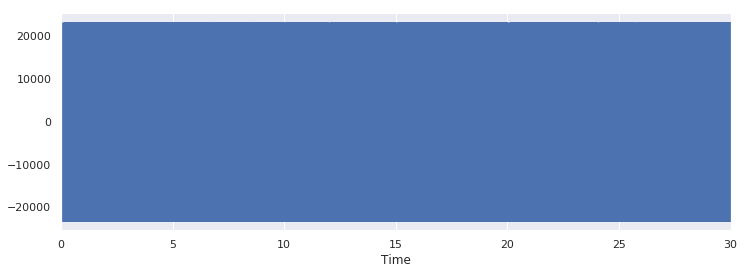

In [88]:
sample_rate, samples = scipy.io.wavfile.read(ultrasound)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

(1025, 5168)
(1025, 5168)


/home/hanqing/anaconda3/envs/DL/lib/python3.6/site-packages/librosa/core/spectrum.py:1029: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


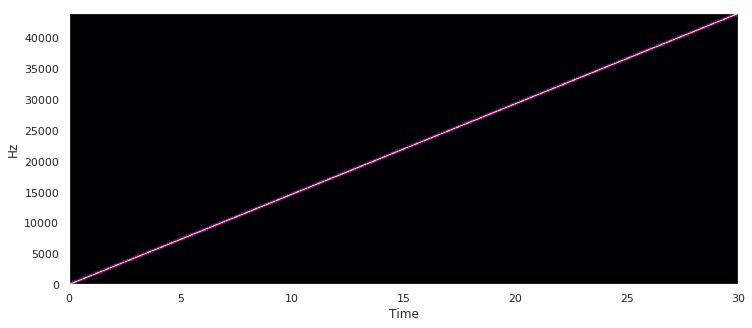

In [89]:
X = librosa.stft(samples.astype('float'))
print(X.shape)
Xdb = librosa.amplitude_to_db(X)
print(Xdb.shape)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

In [94]:
first = 'TIMIT/TRAIN/DR1/FCJF0/'
wav_list = [l for l in os.listdir(first) if(l[-3:]=='wav')]

In [95]:
wav_list

['SI1657.WAV.wav',
 'SI1027.WAV.wav',
 'SX127.WAV.wav',
 'SX307.WAV.wav',
 'SX217.WAV.wav',
 'SA2.WAV.wav',
 'SX37.WAV.wav',
 'SA1.WAV.wav',
 'SI648.WAV.wav',
 'SX397.WAV.wav']

In [96]:
random_first = first + random.choice(wav_list)
print(random_first)

TIMIT/TRAIN/DR1/FCJF0/SA2.WAV.wav


In [97]:
Audio(random_first)

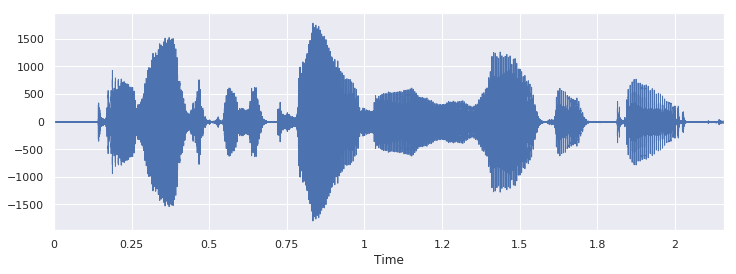

In [98]:
sample_rate, samples = scipy.io.wavfile.read(random_first)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

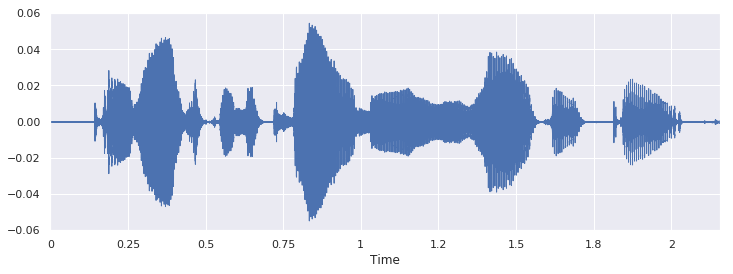

In [99]:
samples, sample_rate = librosa.core.load(random_first, 16000)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()

In [111]:
intervals = librosa.effects.split(samples, top_db=30)

In [112]:
intervals

array([[ 1536, 33792]])

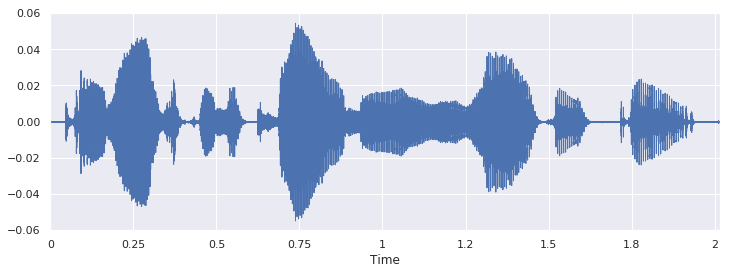

In [104]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[intervals[0][0]:intervals[0][1]].astype('float'), sr=sample_rate)
plt.show()

In [105]:
tisv_frame = 180
hop_time = 0.01
window_length_time = 0.025
sample_rate = 16000
n_fft = 512

In [106]:
utter_min_len = (tisv_frame*hop_time + window_length_time) * sample_rate
utter_min_len

29200.0

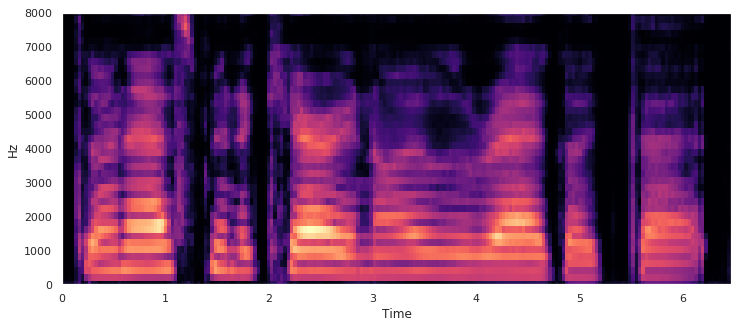

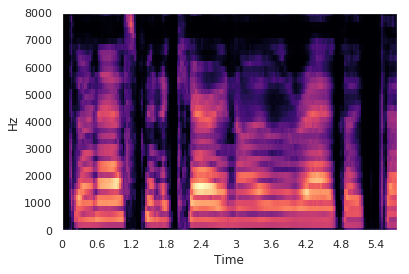

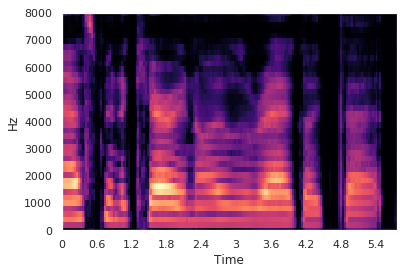

In [110]:
for interval in intervals:
    if(interval[1] - interval[0] > utter_min_len):
        utter_part = samples[interval[0]:interval[1]]
        S = librosa.core.stft(y=utter_part, n_fft=n_fft, win_length=int(window_length_time*sample_rate), hop_length=int(hop_time*sample_rate))
        S = np.abs(S) ** 2
        mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=40)
        S = np.log10(np.dot(mel_basis, S)+1e-6)
        plt.figure(figsize=(12, 5))
        librosa.display.specshow(S, sr=sample_rate, x_axis='time', y_axis='hz') # whole frames
        plt.show()
        librosa.display.specshow(S[:,:180], sr=sample_rate, x_axis='time', y_axis='hz') # first 180 frames in time
        plt.show()
        librosa.display.specshow(S[:,-180:], sr=sample_rate, x_axis='time', y_axis='hz') # last 180 frames in time
        plt.show()

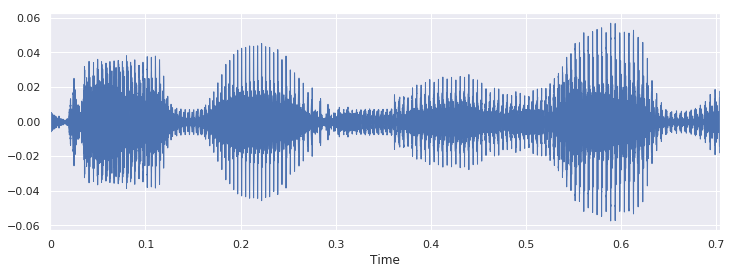

In [83]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[3584:14848].astype('float'), sr=sample_rate)
plt.show()

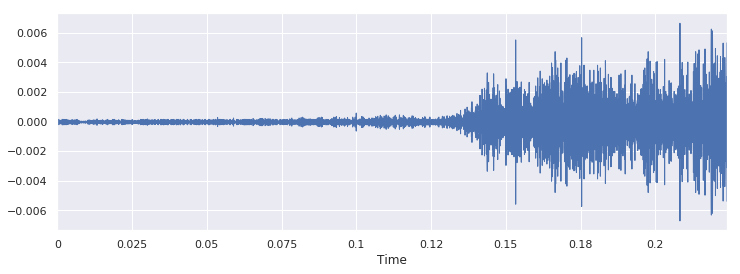

In [85]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[0:3584].astype('float'), sr=sample_rate)
plt.show()

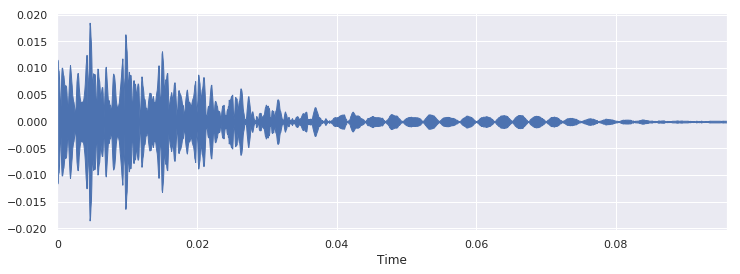

In [86]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[14848:16384].astype('float'), sr=sample_rate)
plt.show()

(1025, 114)
(1025, 114)


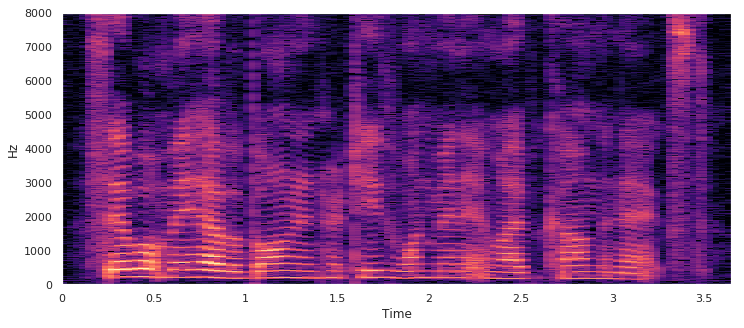

In [74]:
X = librosa.stft(samples.astype('float'))
print(X.shape)
Xdb = librosa.amplitude_to_db(X)
print(Xdb.shape)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

In [25]:
random_fist = first + random.choice(wav_list)
print(random_fist)
Audio(random_fist)


TIMIT/TRAIN/DR1/FCJF0/SX307.WAV.wav


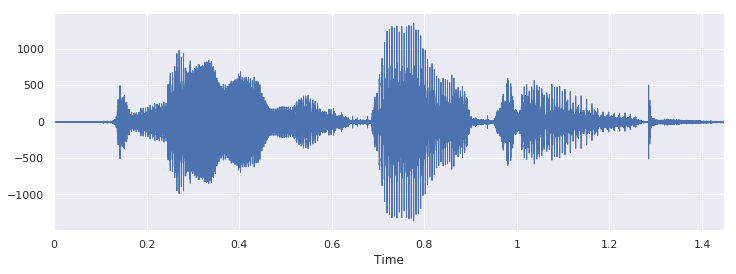

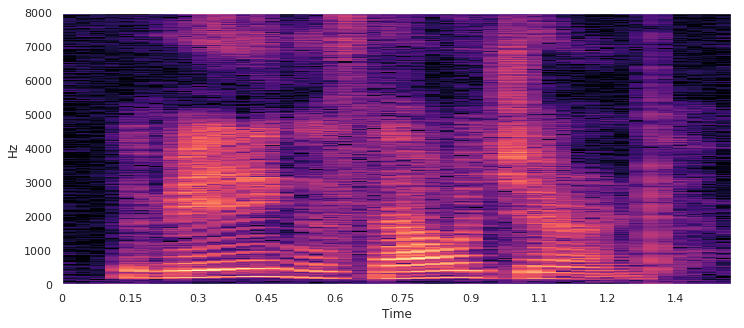

In [26]:
sample_rate, samples = scipy.io.wavfile.read(random_fist)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()